In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"  #columns=city, driver_count, type
ride_data_to_load = "data/ride_data.csv"   #columns= city, date, fare, ride_id

# Read the City and Ride Data
city_data_df = pd.read_csv("data/city_data.csv") #columns = city, driver_count, type
ride_data_df = pd.read_csv("data/ride_data.csv") 

# Combine the data into a single dataset
merge_table = pd.merge(city_data_df, ride_data_df, on="city", how="outer")  #columns = city, driver_count, type, date, fare, ride_id

# Display the data table for preview
print(merge_table)
    
merge_table_type = merge_table[["type", "city"]]
x2 = merge_table_type.groupby("city")
x3 = x2.max()
x2_df = pd.DataFrame(x3)
x4 = x2_df.reset_index()
x4

#DRIVER COUNT & CITY
merge_table_city_driver_count = merge_table[["city", "driver_count"]]  #columns= city, driver_count


                 city  driver_count   type             date   fare  \
0         Richardfort            38  Urban   2/24/2018 8:40  13.93   
1         Richardfort            38  Urban  2/13/2018 12:46  14.00   
2         Richardfort            38  Urban  2/16/2018 13:52  17.92   
3         Richardfort            38  Urban   2/1/2018 20:18  10.26   
4         Richardfort            38  Urban   4/17/2018 2:26  23.00   
5         Richardfort            38  Urban   4/21/2018 3:44   9.54   
6         Richardfort            38  Urban    2/3/2018 0:14  29.04   
7         Richardfort            38  Urban   2/8/2018 15:50  16.55   
8         Richardfort            38  Urban   4/3/2018 15:07  40.77   
9         Richardfort            38  Urban  2/19/2018 14:09  27.11   
10        Richardfort            38  Urban   4/22/2018 3:06  39.74   
11        Richardfort            38  Urban  1/31/2018 14:51  43.92   
12        Richardfort            38  Urban   3/4/2018 22:13  14.83   
13        Richardfor

## Bubble Plot of Ride Sharing Data

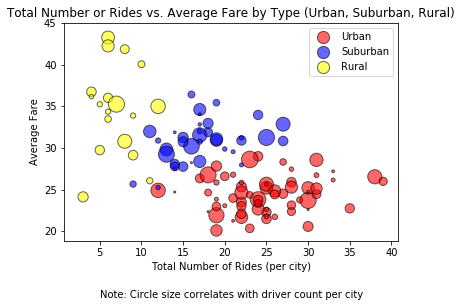

In [2]:
# Obtain the x and y coordinates for each of the three city types
avg_mean_table = merge_table.groupby("city").mean()
avg_fare_per_city = avg_mean_table["fare"]  # Y-axis average fare per city Y-axis

avg_table = merge_table.groupby("city")
total_num_rides_per_city = avg_table["ride_id"] 
x = total_num_rides_per_city.count()   #X -axis

master = pd.merge(avg_mean_table["fare"], x, on="city", how="outer")
master_df = pd.DataFrame(master)
master_df1 = master_df.reset_index()
master_df1_renamed = master_df1.rename(columns={"fare":"Average fare","ride_id": "Total number of rides"})
master_df1_renamed

merge2 = pd.merge(master_df1_renamed, x4, on="city", how="outer")#merge2              
merge2  #columns = city, Average fare, Total number of rides, type
merge3 = pd.merge(merge2, merge_table_city_driver_count, on="city", how="outer")
#print(merge3) # columns = city, Average fare, Total number of rides,  type, driver_count

###
merge4 = merge3.groupby("city").mean()  #groups by city name and averages #city, Average fare, Total Number of Rides, driver_count
merge4_df = pd.DataFrame(merge4)
merge5 = merge4_df.reset_index()  #reset index, city name to column 1
#print(merge5)

#Selects each dataset by type(urban, suburban, rural) for future plotting
merge2_urban = merge2.loc[merge2['type'] == "Urban"]  #displays for urban only: city, Average fare, Total Number of Rides, type=urban only
merge2_suburban = merge2.loc[merge2['type'] == "Suburban"]
merge2_rural = merge2.loc[merge2['type'] == "Rural"]  #columns =     city, Average fare, Total Number of Rides, type=rural            

#BUBBLE SIZES
s_urban = merge5["driver_count"]
s_suburban = merge5["driver_count"]
s_rural = merge5["driver_count"]

# Build the scatter plots for each city types
plt.scatter(merge2_urban["Total number of rides"],merge2_urban["Average fare"], s=s_urban *4, marker='o', facecolors="red", linewidths=1, edgecolors="black",alpha=0.60,label='Urban')
plt.scatter(merge2_suburban["Total number of rides"],merge2_suburban["Average fare"], s=s_suburban *4, marker='o', facecolors="blue",linewidths=1, edgecolors="black",alpha=0.60,label='Suburban')
plt.scatter(merge2_rural["Total number of rides"],merge2_rural["Average fare"], s=s_rural *4, marker='o', facecolors="yellow", linewidths=1,edgecolors="black",alpha=0.60,label='Rural')

# Incorporate the other graph properties
# Add labels to the x and y axes & title
plt.title("Total Number or Rides vs. Average Fare by Type (Urban, Suburban, Rural)")
plt.xlabel("Total Number of Rides (per city)")
plt.ylabel("Average Fare")

# Create a legend
plt.legend(loc="best")  

# Incorporate a text label regarding circle size
plt.text(5,12,'Note: Circle size correlates with driver count per city')

# Save Figure
plt.savefig("../Images/Pyberscatter.png", bbox_inches="tight")

# Show plot
plt.show()

## Total Fares by City Type

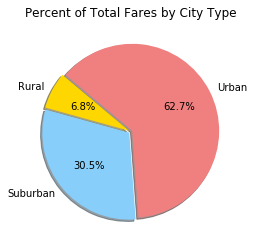

In [3]:
# Calculate Type Percents
#need to find the fare sum for each type
merge_table
fare_total = merge_table.groupby("type").sum()
fare_total_reset = fare_total.reset_index()
fare_total_reset
# Build Pie Chart
labels = ["Rural", "Suburban", "Urban"]
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0.02, 0.02, 0.02)
plt.pie(fare_total_reset["fare"], labels=labels, colors=colors, explode=explode, shadow=True, autopct="%1.1f%%", startangle=140)
plt.title("Percent of Total Fares by City Type")
# Save Figure
plt.savefig("../Images/percentage_of_total_fares_by_type.png")
# Show Figure
plt.show()

## Total Rides by City Type

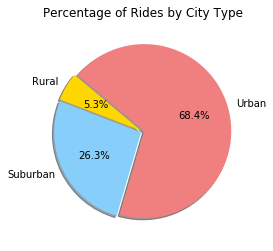

In [4]:
# Calculate Ride Percents
merge_table
total_rides = merge_table.groupby("type").count()
total_rides_reset = total_rides.reset_index()
total_rides_reset
# Build Pie Chart
labels = ["Rural", "Suburban", "Urban"]
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0.02, 0.02, 0.02)
plt.pie(total_rides_reset["ride_id"], labels=labels, colors=colors,explode=explode, shadow=True,autopct="%1.1f%%", startangle=140)
plt.title("Percentage of Rides by City Type")
# Save Figure
plt.savefig("../Images/percentage_of_rides_by_type.png")
# Show Figure
plt.show()

## Total Drivers by City Type

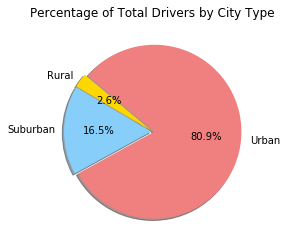

In [5]:
# Calculate Driver Percents
#merge_table
city_data_df
drivers_by_city = city_data_df.groupby("type").sum()
drivers_by_city
# Build Pie Charts
labels = ["Rural", "Suburban", "Urban"]
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0.02, 0.02, 0.02)
plt.pie(drivers_by_city["driver_count"], labels=labels, colors=colors, explode=explode,shadow=True, autopct="%1.1f%%", startangle=140)
plt.title("Percentage of Total Drivers by City Type")
# Save Figure
plt.savefig("../Images/percentage_of_total_drivers_by_type.png")
# Show Figure
plt.show()

In [6]:
print("Ride Trends")
print("1.  Rural areas tend to have higher fares and lower average number of rides, while urban areas have on average lower fares and a high average number of rides.")
print("2.  Rural areas only have 2.6% of total drivers yet have 6.7% of the total fares showing average higher fares compared to both urban and suburban areas.")
print("3.  Rural areas have the highest range in average fares compared to suburban and urban areas.")

Ride Trends
1.  Rural areas tend to have higher fares and lower average number of rides, while urban areas have on average lower fares and a high average number of rides.
2.  Rural areas only have 2.6% of total drivers yet have 6.7% of the total fares showing average higher fares compared to both urban and suburban areas.
3.  Rural areas have the highest range in average fares compared to suburban and urban areas.
